In [1]:
#from bs4 import BeautifulSoup as bs
import requests
import datetime
import numpy as np
import pandas as pd
from time import ctime
import matplotlib.pyplot as plt

In [2]:
# 파일 저장 모듈

import pandas as pd
import datetime as dt
from pmaw import PushshiftAPI

class CsvSave:

    def __init__(self):
        pass
    
    # input으로 받아온 Subreddit의 댓글들을 수집합니다.
    def SelectSubreddit_comments(self):
        api = PushshiftAPI()
        before = int(dt.datetime(2022,3,1,0,0).timestamp())
        after = int(dt.datetime(2021,8,1,0,0).timestamp())
        
        subreddit= str(input('추출하려는 subreddit명을 입력하세요'))
        limit=100000
        comments = api.search_comments(subreddit=subreddit, limit=limit, before=before, after=after)
        print(f'Pushshift를 이용하여 총 {len(comments)} 개의 코멘트들이 출력됩니다.')
        
        comments_df = pd.DataFrame(comments)
        comments_df.to_csv('./wsb_comments_'+subreddit+'.csv', header=True, index=False, columns=list(comments_df.axes[1]),encoding='utf-8')
        data = pd.read_csv('wsb_comments_'+subreddit+'.csv', encoding = 'utf8')
        return data['body']
        
    # input으로 받아온 Subreddit의 게시글들을 수집합니다.
    def SelectSubreddit_submissions(self):
        api = PushshiftAPI()
        before = int(dt.datetime(2022,3,1,0,0).timestamp())
        after = int(dt.datetime(2021,8,1,0,0).timestamp())
        
        subreddit= str(input('추출하려는 subreddit명을 입력하세요'))
        limit=100000
        submissions = api.search_submissions(subreddit=subreddit, limit=limit, before=before, after=after)
        print(f'Pushshift를 이용하여 총 {len(submissions)} 개의 게시글들이 출력됩니다.')
    
        submissions_df = pd.DataFrame(submissions)
        submissions_df.to_csv('./wsb_submissions_'+subreddit+'.csv', header=True, index=False, columns=list(submissions_df.axes[1]),encoding='utf-8')
        data = pd.read_csv('wsb_submissions_'+subreddit+'.csv', encoding = 'utf8')
        return data['selftext']

In [ ]:
Csv1 = CsvSave()

Csv1.SelectSubreddit_comments()

In [ ]:
Csv1 = CsvSave()

Csv1.SelectSubreddit_submissions()

In [3]:
# 시계열 모듈화

import pandas as pd
from time import ctime
import datetime

class CsvOpener:
    
    # comment csv file의 형식은 'wsb_comments_찾고자하는 subreddit명.csv' 입니다.
    # submission csv file의 형식은 'wsb_submissions_찾고자하는 subreddit명.csv' 입니다.
    def __init__(self, file):
        self.file = file
        self.data = pd.read_csv(file, encoding = 'utf8')
        self.header = self.data.columns

    # 정수형의 unix time을 ctime을 통해 우리가 알아볼수 있게 변환
    def TimeConverter_comment(self):    
        cr_time = []
        for i in range(len(self.data)):
            cr_time.append(ctime(self.data.created_utc[i]))
            
        # datetime으로 형 변환
        cr_time = pd.to_datetime(cr_time)
        
        # %Y-%m-%d 형식으로 수정 -> strftime을 사용하면 형변환이 되기 때문에 다시 datetime으로 형변환까지.
        format_time = cr_time.strftime('%Y-%m-%d')
        time = pd.to_datetime(format_time)
        self.data['time'] = time
        
        # 월별로 groupby도 해줍니다.
        self.data['time_month'] = self.data['time'].dt.to_period('M')
        
        # 각 데이터를 주별로 숫자를 표기해줍니다.
        self.data['time_week'] = self.data['time'].dt.week

                        
        return self.data[['body','time','time_month','time_week','score']]
   
    
    
    
    def TimeConverter_submission(self):    
        cr_time = []
        for i in range(len(self.data)):
            cr_time.append(ctime(self.data.created_utc[i]))
            
        # datetime으로 형 변환
        cr_time = pd.to_datetime(cr_time)
        
        # %Y-%m-%d 형식으로 수정 -> strftime을 사용하면 형변환이 되기 때문에 다시 datetime으로 형변환까지.
        format_time = cr_time.strftime('%Y-%m-%d')
        time = pd.to_datetime(format_time)
        self.data['time'] = time
        
        # 월별로 groupby도 해줍니다.
        self.data['time_month'] = self.data['time'].dt.to_period('M')
        
        # 각 데이터를 주별로 숫자를 표기해줍니다.
        self.data['time_week'] = self.data['time'].dt.week
        
        return self.data[['title','selftext','time','time_month','time_week','score','num_comments']]
    
    
    # 결측값을 'empty'로 수정하는 메서드 입니다.
    def FixMissingValue_submission(self):
        self.data['selftext'] = self.data['selftext'].fillna('empty')
        return self.data[['title','selftext','time','time_month','time_week','score','num_comments']]


In [4]:
squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
squidgame_time = squidgame.TimeConverter_submission()
Squidgame_sub = squidgame.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_1232/3639323632.py:1: DtypeWarning: Columns (81,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_1232/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [26]:
KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
KDRAMA_time = KDRAMA.TimeConverter_submission()
KDRAMA_sub = KDRAMA.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/881062989.py:1: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [ ]:
korea = CsvOpener('./wsb_submissions_korea.csv')
korea_time = korea.TimeConverter_submission()
korea_sub = korea.FixMissingValue_submission()

In [ ]:
koreanvariety = CsvOpener('./wsb_submissions_koreanvariety.csv')
koreanvariety_time = koreanvariety.TimeConverter_submission()
koreanvariety_sub = koreanvariety.FixMissingValue_submission()

In [56]:
squidgame = CsvOpener('./wsb_comments_squidgame.csv')
Squidgame_co = squidgame.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_13296/3384557049.py:1: DtypeWarning: Columns (17,50) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_comments_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_13296/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [ ]:
KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
KDRAMA_co = KDRAMA.TimeConverter_comment()

In [ ]:
korea = CsvOpener('./wsb_comments_korea.csv')
korea_co = korea.TimeConverter_comment()

In [ ]:
koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
koreanvariety_co = koreanvariety.TimeConverter_comment()

In [5]:
# 텍스트 마이닝 모듈 

import unicodedata
import sys
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 


class TextEditor():
    
    def __init__(self, file):
        self.file = file
        
    def textEditor(self):
        textlist = list(self.file[str(input('column명을 입력하세요'))].values)
        
        for text in textlist:
            if (text == '[removed]') or (text == '[deleted]') or ('I am a bot' in text):
                textlist.remove(text)

        # 문자열의 구두점을 삭제.
        punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
        titles_punctuation = [string.translate(punctuation) for string in textlist]
        
        titles_fixed = []
        special = re.compile(r'[^ A-Za-z+]')
        for i in titles_punctuation:
            titles_fixed.append(special.sub('',i))
        
        
        titles_tokenized = []
        for titles_token in titles_fixed:
            element = titles_token.split(" ")
            for element_token in element:
                if element_token != '':
                    titles_tokenized.append(element_token.lower())
        
        stop_words = stopwords.words('english') # 불용어 로드
        titles_fixed_stopwords = [word for word in titles_tokenized if word not in stop_words] # 불용어 삭제
       
    
        title = []
        for titles in titles_fixed_stopwords:
            if len(titles) > 2:
                title.append(titles)
                
        result = []
        lemmatizer=WordNetLemmatizer()
        for word in title:
            result.append(lemmatizer.lemmatize(word))
        
        text_refined = []
        for i in result:
            text_tagged = pos_tag(word_tokenize(i))
            text_refined.append(text_tagged)
          
        text_refined2 = []
        for i in range(len(text_refined)):
            text_refined2.append(text_refined[i][0])
            
        return text_refined2

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
Squidgame_sub = TextEditor(Squidgame_sub)
text_refined = Squidgame_sub.textEditor()

column명을 입력하세요title


In [12]:
KDRAMA_sub = TextEditor(KDRAMA_sub)
text_refined = KDRAMA_sub.textEditor()

column명을 입력하세요title


In [ ]:
korea_sub = TextEditor(korea_sub)
text_refined = korea_sub.textEditor()

In [ ]:
koreanvariety_sub = TextEditor(koreanvariety_sub)
text_refined = koreanvariety_sub.textEditor()

In [6]:
Squidgame_co = TextEditor(Squidgame_co)
text_refined = Squidgame_co.textEditor()

column명을 입력하세요body


In [7]:
text_refined

[('hey', 'NN'),
 ('ill', 'NN'),
 ('help', 'NN'),
 ('modding', 'VBG'),
 ('want', 'NN'),
 ('series', 'NN'),
 ('look', 'NN'),
 ('awesome', 'NN'),
 ('love', 'NN'),
 ('discussing', 'VBG'),
 ('show', 'NN'),
 ('reddit', 'NN'),
 ('get', 'VB'),
 ('feeling', 'VBG'),
 ('sub', 'NN'),
 ('blow', 'NN'),
 ('show', 'NN'),
 ('air', 'NN'),
 ('might', 'MD'),
 ('well', 'RB'),
 ('prepare', 'NN'),
 ('beforehand', 'NN'),
 ('really', 'RB'),
 ('find', 'VB'),
 ('game', 'NN'),
 ('get', 'VB'),
 ('marble', 'NN'),
 ('cousin', 'NN'),
 ('told', 'NN'),
 ('looked', 'VBD'),
 ('like', 'IN'),
 ('gta', 'NN'),
 ('loading', 'VBG'),
 ('screen', 'NN'),
 ('actually', 'RB'),
 ('winner', 'NN'),
 ('sinn', 'NN'),
 ('nice', 'JJ'),
 ('money', 'NN'),
 ('sangwoo', 'NN'),
 ('kill', 'NN'),
 ('friend', 'NN'),
 ('death', 'NN'),
 ('isnt', 'NN'),
 ('fightingstrength', 'NN'),
 ('game', 'NN'),
 ('degree', 'NN'),
 ('brain', 'NN'),
 ('involved', 'VBN'),
 ('throw', 'NN'),
 ('agility', 'NN'),
 ('speed', 'NN'),
 ('sang', 'NN'),
 ('woo', 'NN'),
 ('fa

---

In [8]:
title = text_refined

In [27]:
selftext = text_refined

In [60]:
text_forwc = title + selftext 

# 워드클라우드

squidgame_sub, squidgame_co 만

In [6]:
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

NN_stopwords = ['player','squid', 'game', 'squidgame', 'spoiler', 'episode','thing','think','didnt','dont', 'want', 'wouldnt','understand','feel','show','wasnt','theyre','couldnt']
JJ_stopwords = ['empty','english', 'ive', 'american', 'red', 'green']

def tag_wordcloud(element, tag):
    tag_list = []
    for i in element:
        if tag in i:
            tag_list.append(i[0])
    
    if tag == 'JJ':
        tag_list = [word for word in tag_list if word not in JJ_stopwords]
    elif tag == 'NN':
        tag_list = [word for word in tag_list if word not in NN_stopwords]

    count = Counter(tag_list)
    print(count)
    
    wc = WordCloud(max_words = 2000, width = 1600, height = 800)
    generate = wc.generate_from_frequencies(count)
    plt.figure(figsize=(18,18))
    plt.imshow(generate, interpolation = 'bilinear')
    wc.to_file(tag+'_squidgame.png')

# 그래프

각 subreddit sub, com 증감률

In [71]:
squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
squidgame_time = squidgame.TimeConverter_submission()
Squidgame_sub = squidgame.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/3639323632.py:1: DtypeWarning: Columns (81,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [40]:
KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
KDRAMA_time = KDRAMA.TimeConverter_submission()
KDRAMA_sub = KDRAMA.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/881062989.py:1: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [45]:
korea = CsvOpener('./wsb_submissions_korea.csv')
korea_time = korea.TimeConverter_submission()
korea_sub = korea.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [48]:
koreanvariety = CsvOpener('./wsb_submissions_koreanvariety.csv')
koreanvariety_time = koreanvariety.TimeConverter_submission()
koreanvariety_sub = koreanvariety.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [51]:
squidgame = CsvOpener('./wsb_comments_squidgame.csv')
squidgame_co = squidgame.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/1149917347.py:1: DtypeWarning: Columns (17,50) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_comments_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [54]:
KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
KDRAMA_co = KDRAMA.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/16459012.py:1: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [57]:
korea = CsvOpener('./wsb_comments_korea.csv')
korea_co = korea.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/3448111325.py:1: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  korea = CsvOpener('./wsb_comments_korea.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [60]:
koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
koreanvariety_co = koreanvariety.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/1994467615.py:1: DtypeWarning: Columns (3,41) have mixed types.Specify dtype option on import or set low_memory=False.
  koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [72]:
def graph(dataframe):
    sns.countplot(x=dataframe['time_week'], data=dataframe, order=[33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9])
    plt.savefig(str(input("파일명"))+".png")

파일명Squidgame_sub


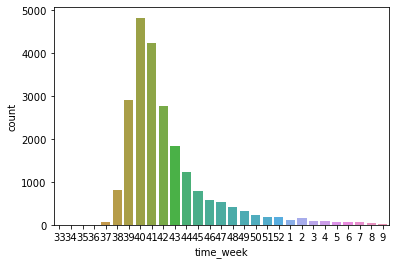

In [73]:
graph(Squidgame_sub)

# 비지도학습 감정분석

In [47]:
# sentiwordnet

# Squidgame_sub의 title을 먼저 정제해 줍니다.
result = []
special = re.compile(r'[^ A-Za-z+]')
for i in Squidgame_sub['title'].values:
    result.append(special.sub('',i))
    
array = np.array(result)
Squidgame_sub['title'] = array

C:\Users\neimb\AppData\Local\Temp/ipykernel_10056/3134902696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squidgame_sub['title'] = array


In [48]:
# nltk로부터 sentiwordnet 감성 사전 불러오기
import nltk
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')


# Positive score와 negative score를 tuple로 표현하여 반환하는 함수 (positive score, negative score)
def word_sentiment_calculator(word, tag):
    pos_score = 0
    neg_score = 0
    
    # sentence_sentiment_calculator함수에서 받아온 태깅된 단어를 유의어 사전과 비교
    # 해당 단어의 유의어가 감성 사전에 있다면 유의어사전 리스트로 불러옴, 없으면 positive, negative 0으로 반환 
    if 'NN' in tag and len(list(swn.senti_synsets(word, 'n')))>0:
        syn_set = list(swn.senti_synsets(word, 'n'))
    elif 'VB' in tag and len(list(swn.senti_synsets(word, 'v')))>0:
        syn_set = list(swn.senti_synsets(word, 'v'))
    elif 'JJ' in tag and len(list(swn.senti_synsets(word, 'a')))>0:
        syn_set = list(swn.senti_synsets(word, 'a'))
    elif 'RB' in tag and len(list(swn.senti_synsets(word, 'r')))>0:
        syn_set = list(swn.senti_synsets(word, 'r'))
    else:
        return (0,0)
    
    # 특정 단어가 속한 유의어 집합의 positive score와 negative score를 모두 합한 후 평균 도출
    for syn in syn_set:
        pos_score += syn.pos_score()
        neg_score += syn.neg_score()
    return (pos_score/len(syn_set), neg_score/len(syn_set))


# sentence를 받아서 토큰화, 품사 태깅
def sentence_sentiment_calculator(sentence):
    tokens =  nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    
    pos_score = 0
    neg_score = 0
    for word, tag in pos_tags:
        pos_score += word_sentiment_calculator(word, tag)[0]
        neg_score += word_sentiment_calculator(word, tag)[1]
    return (pos_score, neg_score)

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [49]:
# 함수들을 이용하여 title의 문장들을 감성분석합니다.
scores = []
for title in Squidgame_sub.title.values:
    scores.append(sentence_sentiment_calculator(title))
scores = np.array(scores)

In [50]:
np.set_printoptions(threshold=sys.maxsize)
scores

array([[0.25625   , 0.046875  ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.04166667, 0.08333333],
       [1.09861493, 0.0674794 ],
       [0.52445652, 0.23097826],
       [0.52445652, 0.23097826],
       [0.73591765, 0.33591658],
       [0.44884615, 0.52423077],
       [0.49772727, 0.19545455],
       [0.19835072, 0.18125578],
       [0.        , 0.21875   ],
       [0.97919789, 0.81002777],
       [0.04058442, 0.70616883],
       [0.02884615, 0.01923077],
       [0.47916667, 0.02083333],
       [0.13916667, 0.0825    ],
       [0.03846154, 0.        ],
       [0.        , 0.        ],
       [0.125     , 0.35      ],
       [0.18939394, 0.04545455],
       [0.59545455, 0.15340909],
       [0.55094697, 0.28409091],
       [0.1875    , 0.34659091],
       [0.80492654, 0.77629534],
       [0.66671154, 0.88777564],
       [0.27884615, 0.14423077],
       [0.743289  , 0.2227356 ],
       [0.03835227, 0.10795455],
       [0.33106061, 0.3010101 ],
       [0.

In [51]:
# Squidgame_sub dataFrame에 각 title의 positive score, negative score을 컬럼으로 저장해줍니다.
positive = []
negative = []
for i in range(len(scores)):
    positive.append(scores[i][0])
    negative.append(scores[i][1])
    
Squidgame_sub['pos'] = np.array(positive)
Squidgame_sub['neg'] = np.array(negative)
Squidgame_sub

C:\Users\neimb\AppData\Local\Temp/ipykernel_10056/1404955307.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squidgame_sub['pos'] = np.array(positive)
C:\Users\neimb\AppData\Local\Temp/ipykernel_10056/1404955307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squidgame_sub['neg'] = np.array(negative)


,title,selftext,time,time_month,time_week,score,num_comments,pos,neg
0,Standby for dates of when Squidgame will release,If anyone wants to help with modding let me kn...,2021-08-18,2021-08,33,1,7,0.256250,0.046875
1,rsquidgame Lounge,A place for members of r/squidgame to chat wit...,2021-08-18,2021-08,33,1,0,0.000000,0.000000
2,What if,"So, since you all saw, Gi Hun ended up picking...",2021-10-24,2021-10,42,1,3,0.000000,0.000000
3,D,empty,2021-10-24,2021-10,42,1,28,0.041667,0.083333
4,Is the series dub good enough to be worth watc...,"What I mean is, is the dub of the series actua...",2021-10-24,2021-10,42,1,6,1.098615,0.067479
...,...,...,...,...,...,...,...,...,...
22669,But he went to SNU,empty,2021-10-11,2021-10,41,1,0,0.016667,0.004167
22670,Episode Ggnabu is definitely the best episode...,empty,2021-10-11,2021-10,41,1,1,1.462852,0.158594
22671,not mine,empty,2021-10-11,2021-10,41,1,1,0.000000,0.687500
22672,Hi I made some fanart for Saebyeok Hope you gu...,empty,2021-10-11,2021-10,41,1,6,0.220238,0.132653


In [52]:
# time_week컬럼은 각 연도의 n주차, 정수 데이터로 표시되어있기때문에, 먼저 21년/22년의 데이터를 구분해줍니다.
result = []
for i in Squidgame_sub['time_week'].values:
    if i > 10:
        result.append(datetime.date.fromisocalendar(2021,i,1))
    else:
        result.append(datetime.date.fromisocalendar(2022,i,1))
        
Squidgame_sub['time_week'] = np.array(result)

C:\Users\neimb\AppData\Local\Temp/ipykernel_10056/1588884486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squidgame_sub['time_week'] = np.array(result)


In [53]:
# time_week 컬럼을 기준으로 각 수치들의 평균을 구해줍니다. 
sendata = Squidgame_sub.groupby('time_week').mean()
sendata.drop(['score'],axis=1,inplace=True)
sendata.drop(['num_comments'],axis=1,inplace=True)

# 시각화에 더욱 유리하게, neg(부정)컬럼의 값을 음수로 바꿔줍니다.
sendata['neg'] = sendata.neg * -1

In [54]:
plt.rcParams["figure.figsize"] = (15,15)

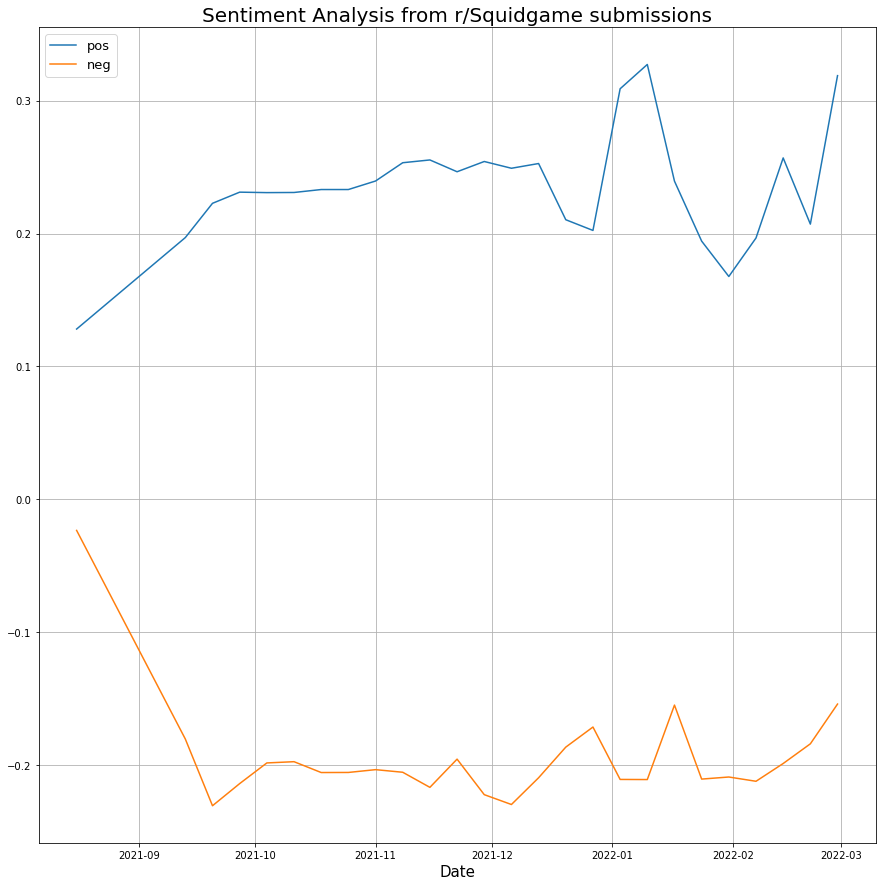

In [55]:
# r/squidgame의 게시글 title로부터 추출한 시간에 따른 이용자들의 감정변화 그래프
sendata.plot.line()


plt.title('Sentiment Analysis from r/Squidgame submissions', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.legend(fontsize=13, loc='best')
plt.grid()
plt.show()

In [56]:
Squidgame_sub

,title,selftext,time,time_month,time_week,score,num_comments,pos,neg
0,Standby for dates of when Squidgame will release,If anyone wants to help with modding let me kn...,2021-08-18,2021-08,2021-08-16,1,7,0.256250,0.046875
1,rsquidgame Lounge,A place for members of r/squidgame to chat wit...,2021-08-18,2021-08,2021-08-16,1,0,0.000000,0.000000
2,What if,"So, since you all saw, Gi Hun ended up picking...",2021-10-24,2021-10,2021-10-18,1,3,0.000000,0.000000
3,D,empty,2021-10-24,2021-10,2021-10-18,1,28,0.041667,0.083333
4,Is the series dub good enough to be worth watc...,"What I mean is, is the dub of the series actua...",2021-10-24,2021-10,2021-10-18,1,6,1.098615,0.067479
...,...,...,...,...,...,...,...,...,...
22669,But he went to SNU,empty,2021-10-11,2021-10,2021-10-11,1,0,0.016667,0.004167
22670,Episode Ggnabu is definitely the best episode...,empty,2021-10-11,2021-10,2021-10-11,1,1,1.462852,0.158594
22671,not mine,empty,2021-10-11,2021-10,2021-10-11,1,1,0.000000,0.687500
22672,Hi I made some fanart for Saebyeok Hope you gu...,empty,2021-10-11,2021-10,2021-10-11,1,6,0.220238,0.132653


---

In [7]:
# vader

# Squidgame_sub의 title을 먼저 정제해 줍니다.
result = []
special = re.compile(r'[^ A-Za-z+]')
for i in Squidgame_sub['title'].values:
    result.append(special.sub('',i))
    
array = np.array(result)
Squidgame_sub['title'] = array

C:\Users\neimb\AppData\Local\Temp/ipykernel_1232/3269352376.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squidgame_sub['title'] = array


In [8]:
# 만들어놓았던 DataFrame을 이용하여 감정분석을 실시합니다.
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

sentiment = [ sia.polarity_scores(i) for i in Squidgame_sub.title]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# 감정분석의 결과를 sendata 변수에 저장합니다.
# 시간에 따른 감정지수의 변화를 확인하기 위해, 기존 DataFrame에서 time_week 컬럼을 가져옵니다.
sendata = pd.DataFrame(sentiment)
sendata['time_week'] = Squidgame_sub.time_week

# time_week컬럼은 각 연도의 n주차, 정수 데이터로 표시되어있기때문에, 먼저 21년/22년의 데이터를 구분해줍니다.
result = []
for i in sendata['time_week'].values:
    if i > 10:
        result.append(datetime.date.fromisocalendar(2021,i,1))
    else:
        result.append(datetime.date.fromisocalendar(2022,i,1))
        
sendata['time_week'] = np.array(result)

In [10]:
Squidgame_sub['neg'] = sendata['neg']
Squidgame_sub['neu'] = sendata['neu']
Squidgame_sub['pos'] = sendata['pos']
Squidgame_sub['compound'] = sendata['compound']

C:\Users\neimb\AppData\Local\Temp/ipykernel_1232/2041342518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squidgame_sub['neg'] = sendata['neg']
C:\Users\neimb\AppData\Local\Temp/ipykernel_1232/2041342518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squidgame_sub['neu'] = sendata['neu']
C:\Users\neimb\AppData\Local\Temp/ipykernel_1232/2041342518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [11]:
# time_week 컬럼을 기준으로 각 수치들의 평균을 구해줍니다. 
sendata = sendata.groupby('time_week').mean()

# 필요없거나, 결측값을 제거해줍니다.
sendata = sendata.drop(sendata.index[0])
sendata = sendata.drop(sendata.index[-1])

# 시각화에 더욱 유리하게, neg(부정)컬럼의 값을 음수로 바꿔주고, neu(중립)컬럼을 삭제해줍니다.
sendata['neg'] = sendata.neg * -1
sendata = sendata.drop(['neu'],axis=1)

In [12]:
plt.rcParams["figure.figsize"] = (15,15)

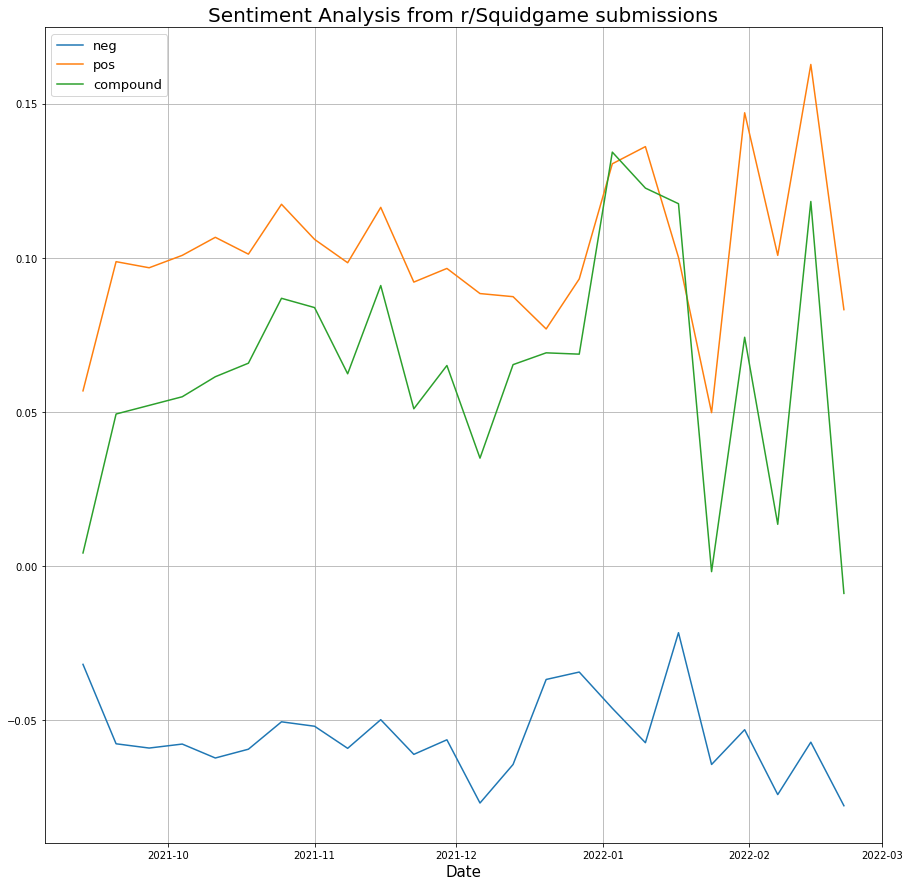

In [13]:
# r/squidgame의 게시글 title로부터 추출한 시간에 따른 이용자들의 감정변화 그래프
sendata.plot.line()


plt.title('Sentiment Analysis from r/Squidgame submissions', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.legend(fontsize=13, loc='best')
plt.grid()
plt.show()

In [14]:
Squid_sort = Squidgame_sub.sort_values('compound', ascending=False)
Squid_sort = Squid_sort.reset_index()
Squid_sort.drop(['index'],axis=1,inplace=True)

In [15]:
def checkSentiment(index):
    if Squid_sort.loc[index].compound > 0 :
        print(Squid_sort.loc[index].title,'... is positive')
        print(Squid_sort.loc[index].selftext,'... is positive')
    else :
        print(Squid_sort.loc[index].title,'... is negative')
        print(Squid_sort.loc[index].selftext,'... is negative')

In [37]:
checkSentiment(4)

Hi everyone I made a fan group on DA to appreciate Squid Game fan art and their artists even more   Be sure to take a look at all the beautiful work in the gallery If you have fan art yourself dont hesitate to join the party so that even more people can see your work   Have a nice day ... is positive
empty ... is positive


In [33]:
checkSentiment(22671)

Whats the saddest moment Or saddest death Or the death that didnt deserve to happen This is mine ... is negative
empty ... is negative


In [16]:
Squid_sort

,title,selftext,time,time_month,time_week,score,num_comments,neg,neu,pos,compound
0,Dont know if somebody else figured it out too ...,empty,2021-10-09,2021-10,40,1,17,0.000,0.542,0.458,0.9821
1,Dont wanna spread hate I love squid game and i...,empty,2021-10-17,2021-10,41,1,54,0.000,0.560,0.440,0.9725
2,Yes I am happy I literally have watched it lik...,empty,2021-10-06,2021-10,40,3,3,0.000,0.700,0.300,0.9694
3,Squid Game promo Come join our Squid Game Wher...,empty,2021-10-05,2021-10,40,18,0,0.021,0.626,0.354,0.9623
4,Hi everyone I made a fan group on DA to apprec...,empty,2021-12-08,2021-12,49,6,6,0.027,0.640,0.333,0.9612
...,...,...,...,...,...,...,...,...,...,...,...
22669,sangwoo i am back from the dead and I will mot...,empty,2022-01-14,2022-01,2,1,0,0.587,0.413,0.000,-0.9300
22670,Ali is not dead and I can prove itso in a firs...,empty,2021-09-30,2021-09,39,1,14,0.196,0.773,0.031,-0.9322
22671,Whats the saddest moment Or saddest death Or t...,empty,2021-10-09,2021-10,40,1,313,0.530,0.470,0.000,-0.9501
22672,Remember Jiyoungs line about the Korean war be...,empty,2021-12-21,2021-12,51,1,0,0.288,0.712,0.000,-0.9571


---
# selftext (폐기)

In [20]:
dr1 = Squidgame_sub[Squidgame_sub['selftext'].str.contains('empty')].index
Squidgame_sub.drop(dr1, inplace=True)

C:\Users\neimb\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
dr2 = Squidgame_sub[Squidgame_sub['selftext'].str.contains('removed')].index
Squidgame_sub.drop(dr2, inplace=True)
Squidgame_sub

,title,selftext,time,time_month,time_week,score,num_comments
0,Standby for dates of when Squidgame will release.,If anyone wants to help with modding let me kn...,2021-08-18,2021-08,33,1,7
1,r/squidgame Lounge,A place for members of r/squidgame to chat wit...,2021-08-18,2021-08,33,1,0
2,What if?,"So, since you all saw, Gi Hun ended up picking...",2021-10-24,2021-10,42,1,3
4,Is the series dub good enough to be worth watc...,"What I mean is, is the dub of the series actua...",2021-10-24,2021-10,42,1,6
8,I saw something that is bizzare and hilarious,I saw something that is bizzare and hilarious ...,2021-10-24,2021-10,42,1,8
...,...,...,...,...,...,...,...
22653,So happy this show has garnered such huge view...,Fantastic show! \n\nDefinitely some influence ...,2021-10-11,2021-10,41,1,0
22655,"I made a ""squid game 'oh shit' moments"" tierlist",After i watched the show i was thinking about ...,2021-10-11,2021-10,41,1,3
22661,Sang Woo,I’m beyond sick of people defending him. The f...,2021-10-11,2021-10,41,1,42
22662,"How does the 'front mans' mask work, he just p...",He just seems to take it off and put it on wit...,2021-10-11,2021-10,41,1,9


In [22]:
Squidgame_sub = Squidgame_sub.reset_index()

In [23]:
result = []
special = re.compile(r'[^ A-Za-z+]')
for i in Squidgame_sub['selftext'].values:
    result.append(special.sub('',i))
    
array = np.array(result)
Squidgame_sub['selftext'] = array

In [24]:
# 만들어놓았던 DataFrame을 이용하여 감정분석을 실시합니다.
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

sentiment = [ sia.polarity_scores(i) for i in Squidgame_sub.selftext]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
sendata = pd.DataFrame(sentiment)


In [26]:
sendata

,neg,neu,pos,compound
0,0.058,0.882,0.060,0.0186
1,0.000,1.000,0.000,0.0000
2,0.147,0.853,0.000,-0.7717
3,0.051,0.877,0.072,0.1119
4,0.000,0.752,0.248,0.7865
...,...,...,...,...
7830,0.072,0.557,0.370,0.8934
7831,0.094,0.906,0.000,-0.5859
7832,0.273,0.616,0.111,-0.9734
7833,0.000,0.908,0.092,0.5511


In [27]:
Squidgame_sub

,index,title,selftext,time,time_month,time_week,score,num_comments
0,0,Standby for dates of when Squidgame will release.,If anyone wants to help with modding let me kn...,2021-08-18,2021-08,33,1,7
1,1,r/squidgame Lounge,A place for members of rsquidgame to chat with...,2021-08-18,2021-08,33,1,0
2,2,What if?,So since you all saw Gi Hun ended up picking t...,2021-10-24,2021-10,42,1,3
3,4,Is the series dub good enough to be worth watc...,What I mean is is the dub of the series actual...,2021-10-24,2021-10,42,1,6
4,8,I saw something that is bizzare and hilarious,I saw something that is bizzare and hilarious ...,2021-10-24,2021-10,42,1,8
...,...,...,...,...,...,...,...,...
7830,22653,So happy this show has garnered such huge view...,Fantastic show Definitely some influence from ...,2021-10-11,2021-10,41,1,0
7831,22655,"I made a ""squid game 'oh shit' moments"" tierlist",After i watched the show i was thinking about ...,2021-10-11,2021-10,41,1,3
7832,22661,Sang Woo,Im beyond sick of people defending him The fac...,2021-10-11,2021-10,41,1,42
7833,22662,"How does the 'front mans' mask work, he just p...",He just seems to take it off and put it on wit...,2021-10-11,2021-10,41,1,9


In [28]:
sendata['time_week'] = Squidgame_sub.time_week

# time_week컬럼은 각 연도의 n주차, 정수 데이터로 표시되어있기때문에, 먼저 21년/22년의 데이터를 구분해줍니다.
result = []
for i in sendata['time_week'].values:
    if i > 10:
        result.append(datetime.date.fromisocalendar(2021,i,1))
    else:
        result.append(datetime.date.fromisocalendar(2022,i,1))
        
sendata['time_week'] = np.array(result)

In [29]:
sendata

,neg,neu,pos,compound,time_week
0,0.058,0.882,0.060,0.0186,2021-08-16
1,0.000,1.000,0.000,0.0000,2021-08-16
2,0.147,0.853,0.000,-0.7717,2021-10-18
3,0.051,0.877,0.072,0.1119,2021-10-18
4,0.000,0.752,0.248,0.7865,2021-10-18
...,...,...,...,...,...
7830,0.072,0.557,0.370,0.8934,2021-10-11
7831,0.094,0.906,0.000,-0.5859,2021-10-11
7832,0.273,0.616,0.111,-0.9734,2021-10-11
7833,0.000,0.908,0.092,0.5511,2021-10-11


In [30]:
# time_week 컬럼을 기준으로 각 수치들의 평균을 구해줍니다. 
sendata = sendata.groupby('time_week').mean()

# 필요없거나, 결측값을 제거해줍니다.
sendata = sendata.drop(sendata.index[0])
sendata = sendata.drop(sendata.index[-1])

# 시각화에 더욱 유리하게, neg(부정)컬럼의 값을 음수로 바꿔주고, neu(중립)컬럼을 삭제해줍니다.
sendata['neg'] = sendata.neg * -1
sendata = sendata.drop(['neu'],axis=1)

In [31]:
plt.rcParams["figure.figsize"] = (15,15)

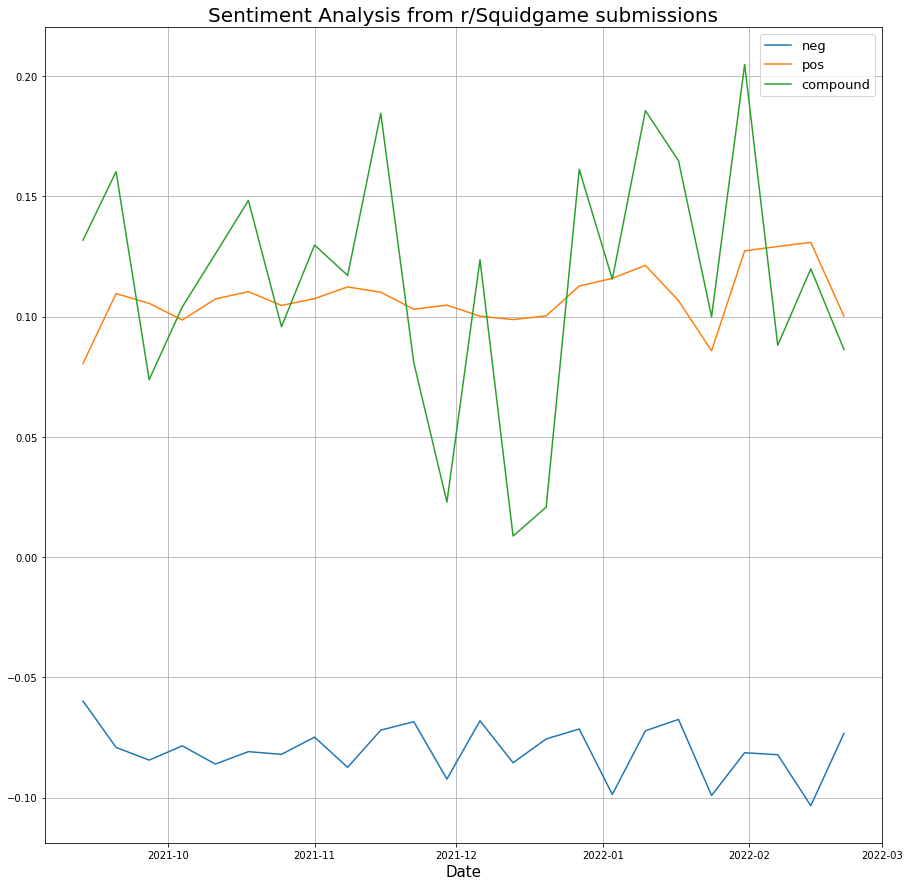

In [32]:
# r/squidgame의 게시글 title로부터 추출한 시간에 따른 이용자들의 감정변화 그래프
sendata.plot.line()


plt.title('Sentiment Analysis from r/Squidgame submissions', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.legend(fontsize=13, loc='best')
plt.grid()
plt.show()